In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['avocado.csv']


In [2]:
avocado=pd.read_csv('../input/avocado.csv')
avocado=pd.DataFrame(avocado)

In [3]:
kolonlar=['Unnamed: 0','Date','AveragePrice','Total_Volume','4046','4225','4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region']
avocado.columns=kolonlar
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total_Volume', '4046', '4225',
       '4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
avocado.head()
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
#avocado.Date.value_counts()
#avocado.AveragePrice.value_counts()

In [6]:
#Date_list=list(avocado['Date'])
#Average_Price_list=list(avocado['AveragePrice'])
#avocado.info()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


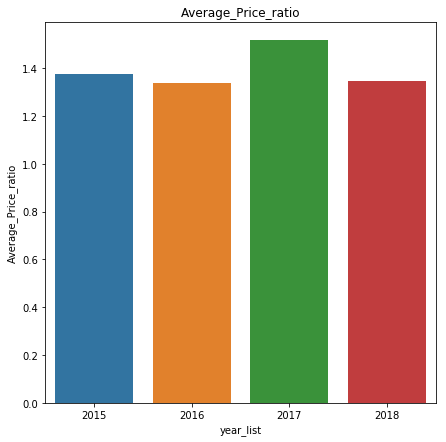

In [7]:
year_list=list(avocado['year'])
Average_Price_ratio=[]
for i in year_list:
    x=avocado[avocado['year']==i]
    Average_Price_rate=sum(x.AveragePrice)/len(x)
    Average_Price_ratio.append(Average_Price_rate)
data=pd.DataFrame({'year_list':year_list,'Average_Price_ratio':Average_Price_ratio})
new_index=(data['Average_Price_ratio'].sort_values(ascending=False)).index.values
sorted_data1=data.reindex(new_index)

plt.figure(figsize=(7,7))
sns.barplot(x=sorted_data1['year_list'],y=sorted_data1['Average_Price_ratio'])
plt.xlabel('year_list')
plt.ylabel('Average_Price_ratio')
plt.title('Average_Price_ratio')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


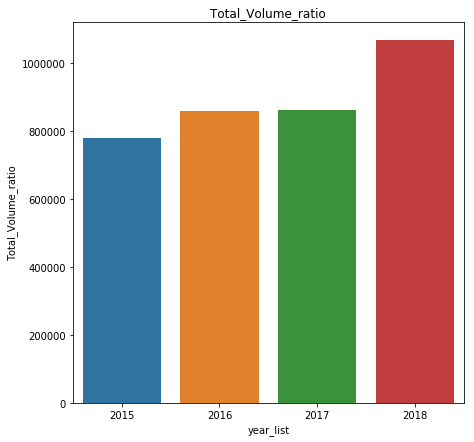

In [8]:
year_list=list(avocado['year'])
Total_Volume_ratio=[]
for i in year_list:
    x=avocado[avocado['year']==i]
    Total_Volume_rate=sum(x.Total_Volume)/len(x)
    Total_Volume_ratio.append(Total_Volume_rate)
data=pd.DataFrame({'year_list':year_list,'Total_Volume_ratio':Total_Volume_ratio})   
new_index=(data['Total_Volume_ratio'].sort_values(ascending=False)).index.values
sorted_data2=data.reindex(new_index)  

plt.figure(figsize=(7,7))
sns.barplot(x=sorted_data2['year_list'],y=sorted_data2['Total_Volume_ratio'])
plt.xlabel('year_list')
plt.ylabel('Total_Volume_ratio')
plt.title('Total_Volume_ratio')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


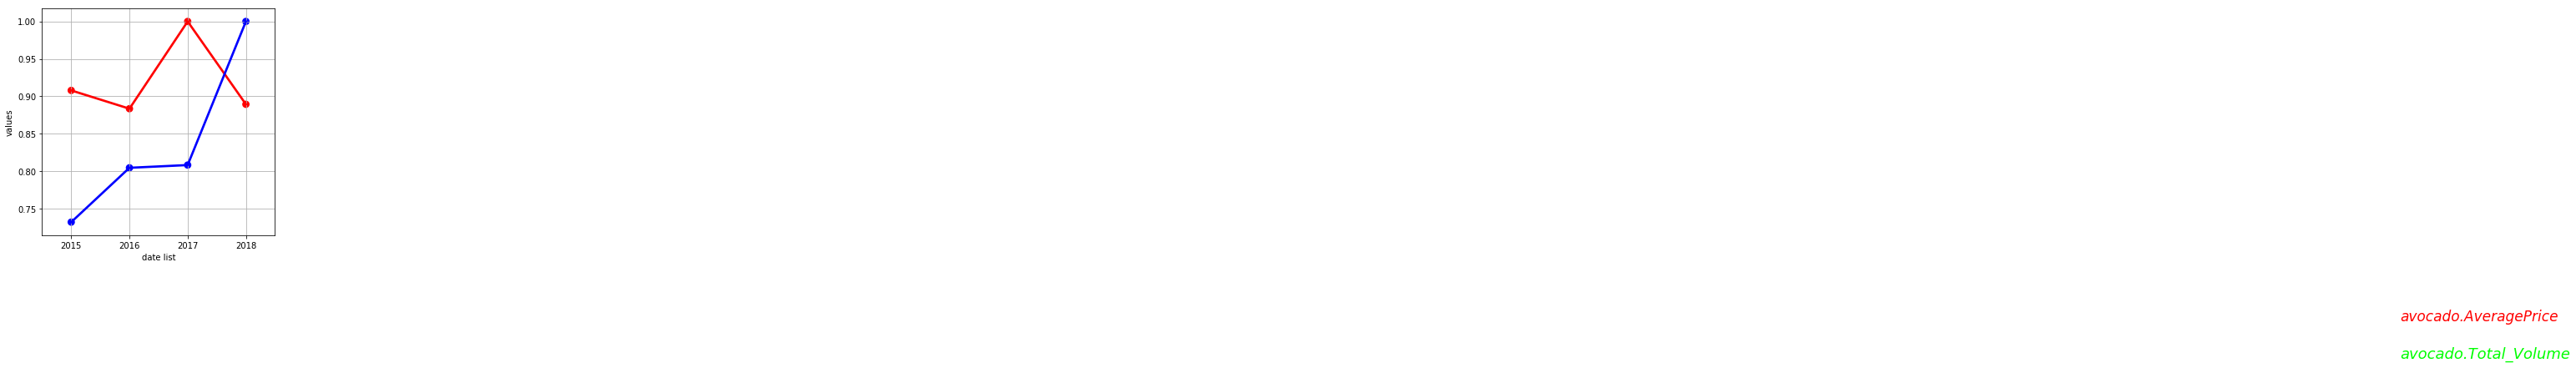

In [11]:
sorted_data1['Average_Price_ratio']=sorted_data1['Average_Price_ratio']/max(sorted_data1['Average_Price_ratio'])
sorted_data2['Total_Volume_ratio']=sorted_data2['Total_Volume_ratio']/max(sorted_data2['Total_Volume_ratio'])
data=pd.concat([sorted_data1,sorted_data2['Total_Volume_ratio']],axis=1)
data.sort_values('Average_Price_ratio',inplace=True)


f,ax1 = plt.subplots(figsize =(5,5))
sns.pointplot(x='year_list',y='Average_Price_ratio',data=data,color='red')
sns.pointplot(x='year_list',y='Total_Volume_ratio',data=data,color='blue')
plt.text(40,0.6,'avocado.AveragePrice',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'avocado.Total_Volume',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('date list')
plt.ylabel('values')
plt.grid()




/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


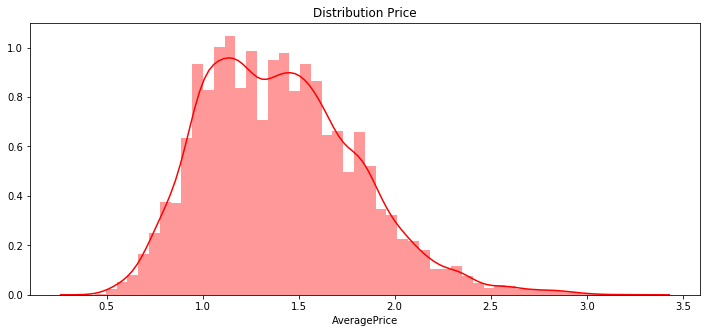

In [13]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(avocado["AveragePrice"], color = 'r')
plt.show()

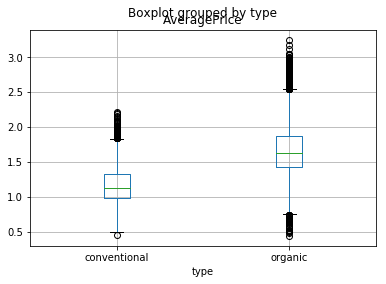

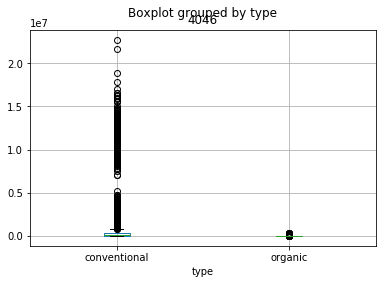

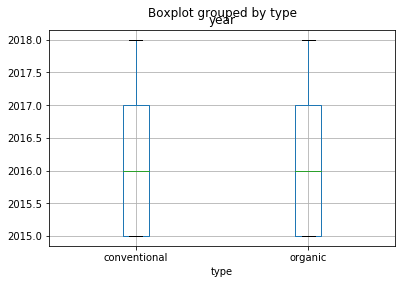

In [15]:
avocado.boxplot(column="AveragePrice", by="type")
avocado.boxplot(column="4046", by="type")
avocado.boxplot(column="year", by="type")
plt.show()